In [ ]:
import math
import numpy as np
import pandas as pd

#import scikitplot
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('data/fer2013.csv')

In [5]:
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [7]:
df.Usage.value_counts()


Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [10]:
df.emotion.unique()

df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [16]:
df.sample(5)

,emotion,pixels,Usage
28188,6,232 232 229 216 194 169 184 205 210 197 167 13...,Training
7513,2,68 57 34 42 50 51 51 45 49 42 58 135 175 183 1...,Training
23435,3,85 71 64 65 63 60 58 63 59 59 63 65 62 52 40 4...,Training
13564,3,19 21 30 39 48 60 69 78 82 90 98 109 118 122 1...,Training
10214,0,255 253 255 192 96 94 90 85 94 118 127 132 154...,Training


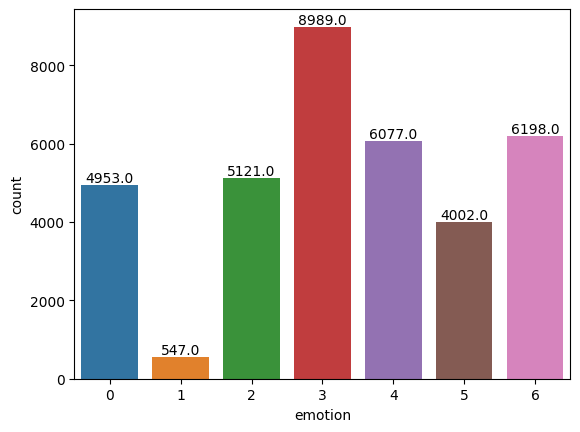

In [20]:
df['emotion'] = df['emotion'].astype('category')
sns.countplot(x='emotion', data=df)
ax = plt.gca()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

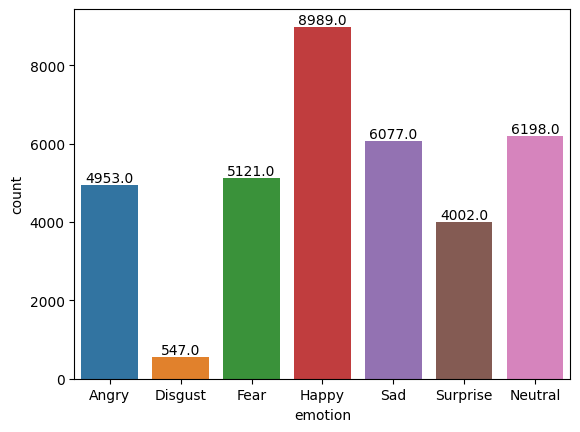

In [21]:
# Define a dictionary that maps integer labels to emotions
emotion_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

# Replace the integer labels with emotions using the map function
df['emotion'] = df['emotion'].map(emotion_dict)

# Plot the count of each emotion
sns.countplot(x='emotion', data=df)

# Add count labels to each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

### Fer2013 Analysis:
There are 7 categories of emotions in the dataset. 
`Disgust` has least amount of images, with 5-10% of other classes.  

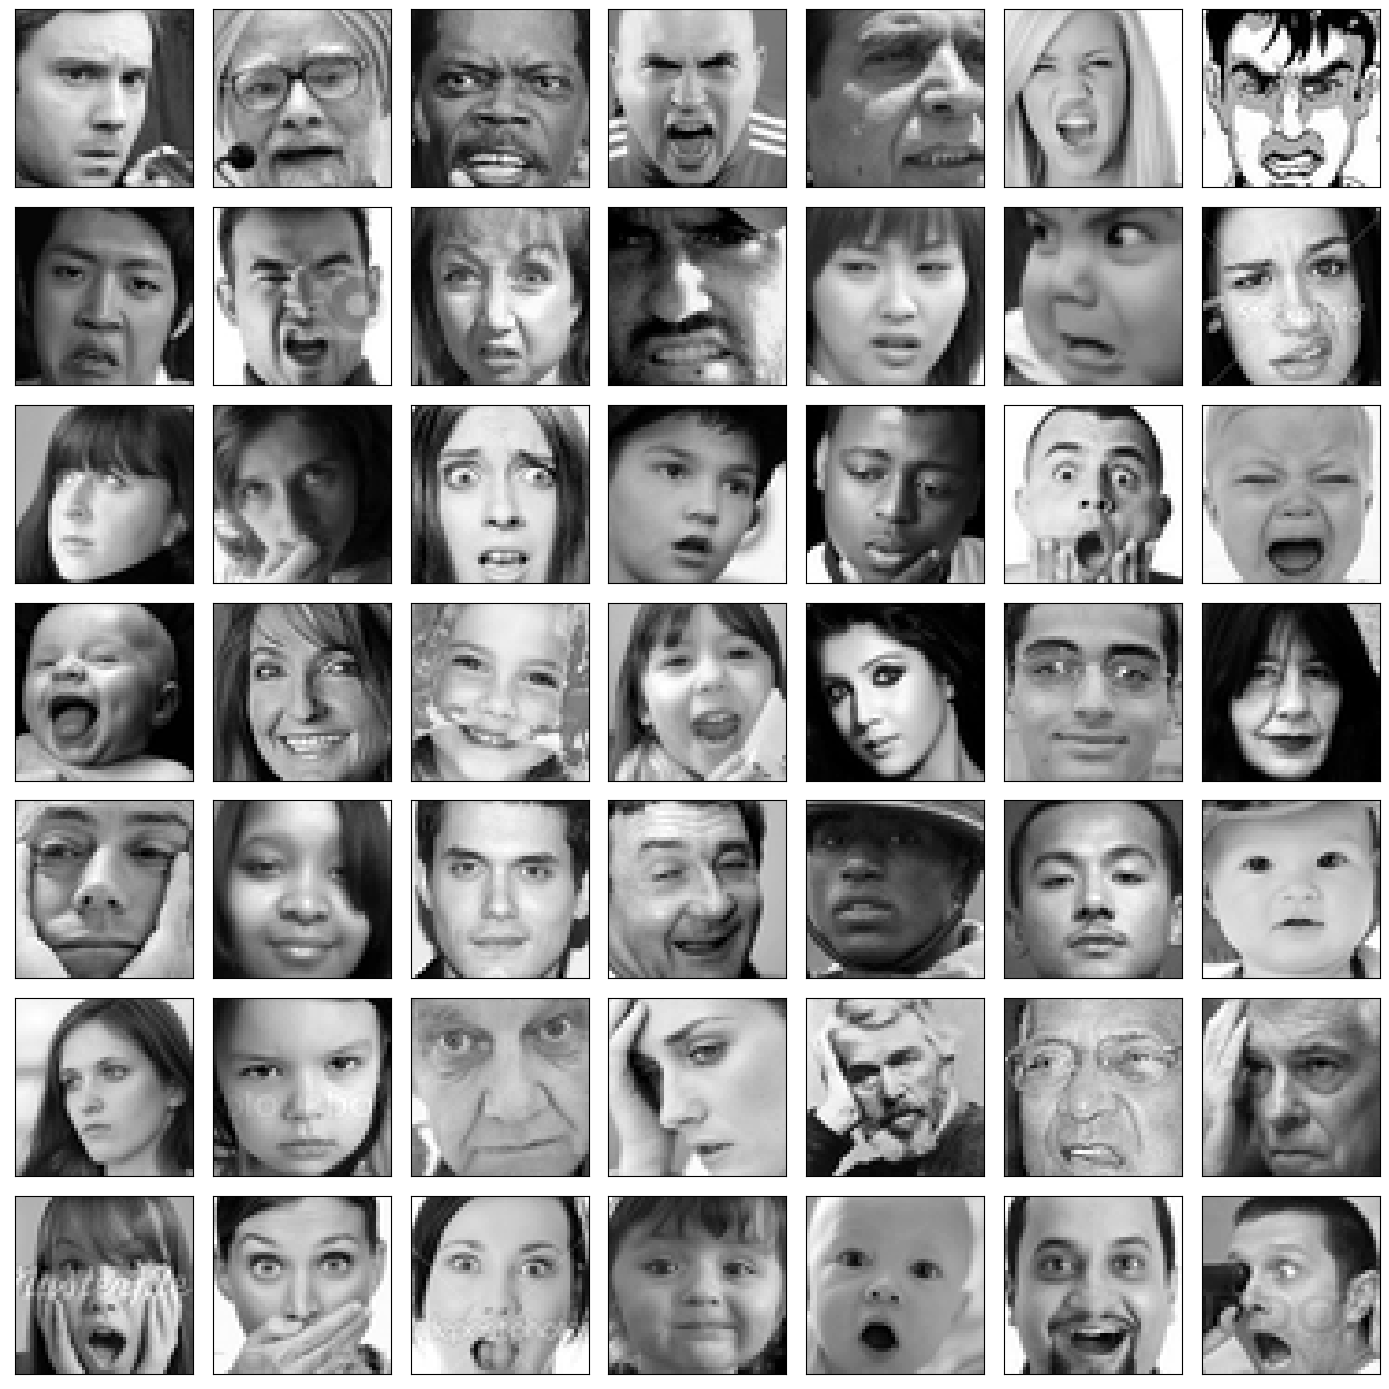

In [29]:
fig = plt.figure(1, (14, 14))


emotion_label_to_text = {
  0: 'anger',
  1: 'disgust',
  2: 'fear',
  3: 'happiness',
  4: 'sadness',
  5: 'surprise',
  6: 'neutral'
}

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        #ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()

### Fer2013 IMAGE Analysis:

1. The data contains a wide range of images like, male, female, kids, olds, white, black etc.
2. It contains some non-human images, like cartoons(first row, last column)
3. dataset contain images collected with different lighting and angles. 